## Sarcopenia Modeling - Sampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Sarco_X_JAN_15_2023-patients.xlsx')

In [3]:
data.head()

,Ad,0,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),...,Egz,AT,CST,GS,GS.1,Star,BMI,Sarcopenia,Gender,Ad.1
0,beyzanur,1,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,...,3-4/week,50.2,12.5,1.21,32.0,1.81,27.8,0,M,beyzanur
1,beyzanur,2,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,...,0,49.0,12.1,1.42,47.0,1.38,35.5,1,M,beyzanur
2,beyzanur,3,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,...,3-4/week,37.3,8.7,1.18,33.0,1.20,31.2,0,M,beyzanur
3,beyzanur,4,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,...,1-2/week,29.5,8.3,1.23,25.0,1.11,26.6,0,F,beyzanur
4,beyzanur,5,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,...,1-2/week,39.5,11.0,1.31,31.0,1.26,31.3,0,F,beyzanur


In [4]:
data.shape

(5016, 44)

In [5]:
data.isnull().sum().sort_values(ascending=False)

Statin                    4331
OTHERS                    3762
DM drug                   3555
Type_HT                   3178
OP                        2970
HT drugs                  2318
MMSE                       901
Duration of 1HT            490
Job                        334
Status                     215
Dıration of HT             182
N_HT                       163
Dyslipidemia duration      127
Waist                      113
Hip                        111
DM duration                 87
KAH duration                74
Education                   65
Egz                         63
Star                        21
İnsülin                     15
GS                          14
BMI                         12
AT                          11
Height                       9
Weight                       9
CST                          6
GS.1                         3
DM                           2
 Smoking (packet/year)       2
Ad                           1
Ad.1                         1
HT      

In [6]:
data.drop(columns=['Statin', 'OP', 'OTHERS', 'DM drug', 'Type_HT', 'HT drugs','Ad', 'Ad.1', 0], inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(3346, 35)

### Exploratory Data Analysis 

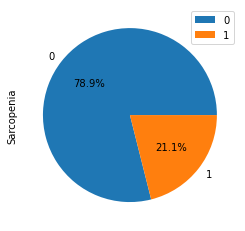

In [9]:
tgt_sarc = data['Sarcopenia'].value_counts().to_frame()
tgt_sarc = tgt_sarc.reset_index()
tgt_sarc.plot.pie(y='Sarcopenia', autopct='%1.1f%%', legend=True);

In [10]:
list_cols_cat = []
for i in data.columns:
    if len(data[i].value_counts()) <= 10:
        list_cols_cat.append(i) 

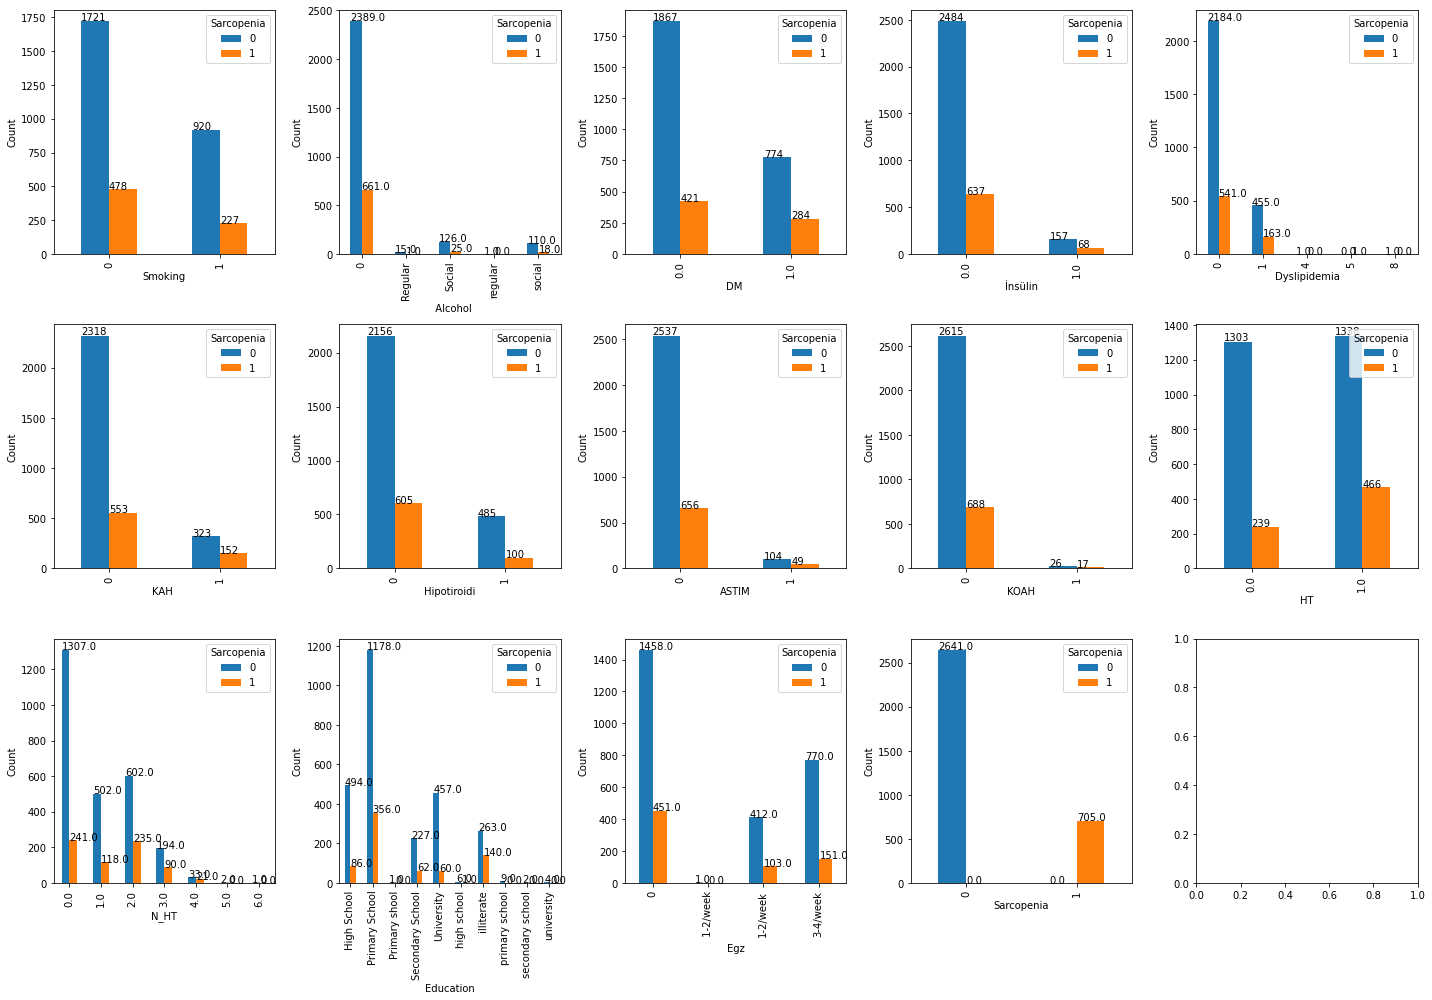

In [11]:
i = 0
fig, axes = plt.subplots(3,5, figsize=(20, 14))

for a in range(0, 3, 1): 
    for b in range(0, 5, 1):         
        ax1 = data.groupby(['Sarcopenia',list_cols_cat[i]])['Sarcopenia'].count().unstack(0).plot.bar( 
                                                    xlabel = list_cols_cat[i], ylabel='Count', ax=axes[a, b])
        for p in ax1.patches:
            ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        if i == 13:
            break 
        else :
            i +=1
            
fig.tight_layout()

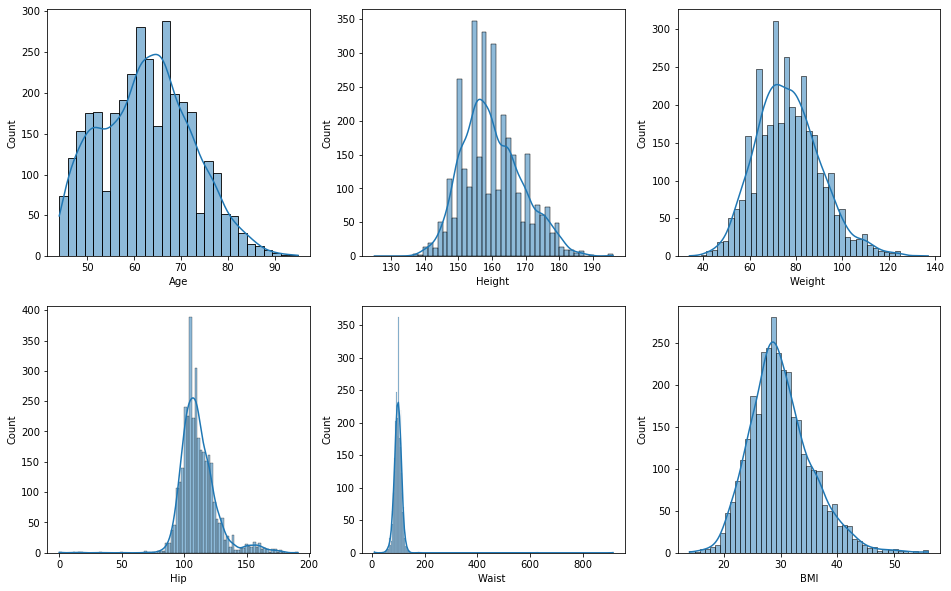

In [12]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
sns.histplot(data["Age"], ax=axes[0,0], kde=True)
sns.histplot(data["Height "], ax=axes[0,1], kde=True)
sns.histplot(data["Weight "], ax=axes[0,2], kde=True)
sns.histplot(data["Hip"], ax=axes[1,0], kde=True)
sns.histplot(data["Waist "], ax=axes[1,1], kde=True)
sns.histplot(data["BMI"], ax=axes[1,2], kde=True)
fig.tight_layout;

In [13]:
data[['Age','Height ', 'Weight ', 'Waist ', 'Hip','BMI','Sarcopenia']].groupby('Sarcopenia').mean()

,Age,Height,Weight,Waist,Hip,BMI
Sarcopenia,,,,,,
0,60.956077,160.410829,75.746687,97.302158,110.505490,29.558296
1,68.788652,158.643972,79.895035,103.156028,115.321986,31.954723


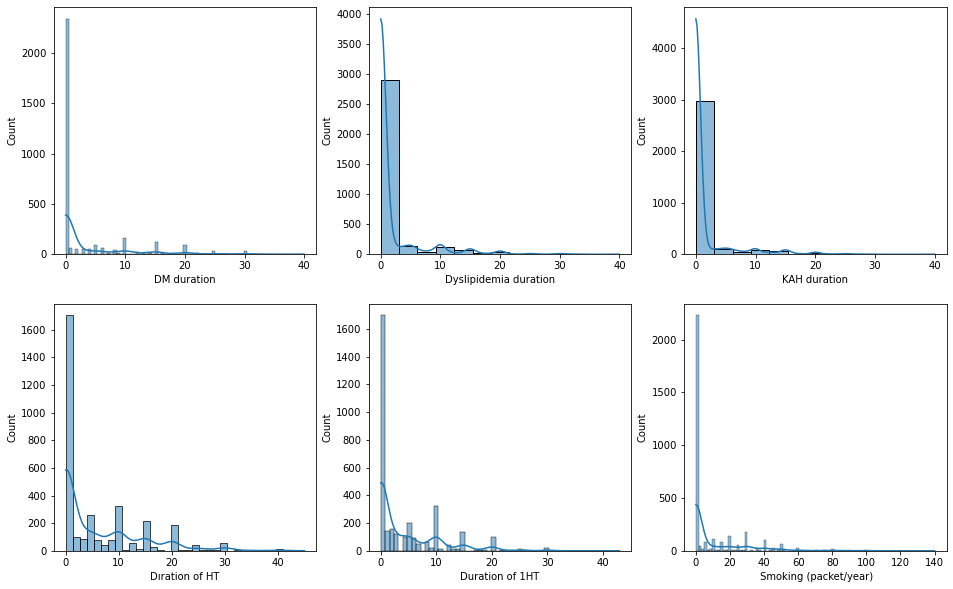

In [14]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
sns.histplot(data["DM duration"], ax=axes[0,0], kde=True)
sns.histplot(data["Dyslipidemia duration"], ax=axes[0,1], kde=True)
sns.histplot(data["KAH duration"], ax=axes[0,2], kde=True)
sns.histplot(data["Dıration of HT"], ax=axes[1,0], kde=True)
sns.histplot(data["Duration of 1HT"], ax=axes[1,1], kde=True)
sns.histplot(data[" Smoking (packet/year)"], ax=axes[1,2], kde=True)

fig.tight_layout;

In [15]:
data[['DM duration','Dyslipidemia duration','KAH duration','Dıration of HT','Duration of 1HT',' Smoking (packet/year)','Sarcopenia']].groupby('Sarcopenia').mean()

,DM duration,Dyslipidemia duration,KAH duration,Dıration of HT,Duration of 1HT,Smoking (packet/year)
Sarcopenia,,,,,,
0,2.889777,1.340288,1.063271,5.049413,3.629118,8.829610
1,5.049504,2.407092,2.037163,8.723546,5.820709,9.775887


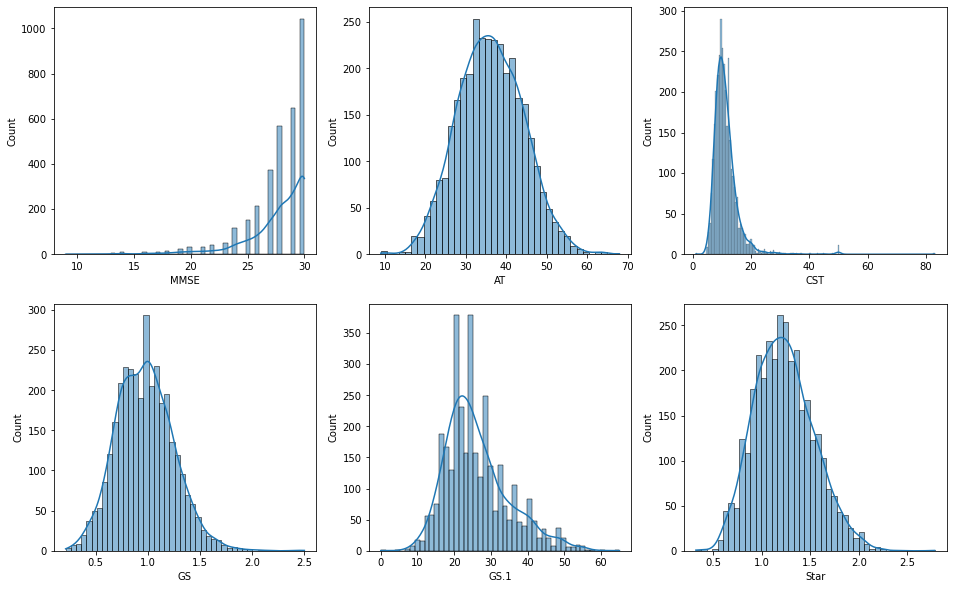

In [16]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
sns.histplot(data["MMSE"], ax=axes[0,0], kde=True)
#sns.histplot(data["Job"], ax=axes[0,1], kde=True)
#sns.histplot(data["Status"], ax=axes[0,2], kde=True)
sns.histplot(data["AT"], ax=axes[0,1], kde=True)
sns.histplot(data["CST"], ax=axes[0,2], kde=True)
sns.histplot(data["GS"], ax=axes[1,0], kde=True)
sns.histplot(data["GS.1"], ax=axes[1,1], kde=True)
sns.histplot(data["Star"], ax=axes[1, 2], kde=True)

fig.tight_layout;

In [17]:
data[['MMSE','AT','CST','GS','GS.1','Star','Sarcopenia']].groupby('Sarcopenia').mean()

,MMSE,AT,CST,GS,GS.1,Star
Sarcopenia,,,,,,
0,27.878455,37.832336,10.532813,1.004716,27.158046,1.303339
1,27.229787,30.010355,14.392709,0.842610,22.200142,0.954426


### Feature Selection

In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [19]:
np.random.seed(123)

In [20]:
data_mod = data.drop(columns=['Job', 'Education'])
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 5012
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSE                    3346 non-null   float64
 1   Age                     3346 non-null   float64
 2   Weight                  3346 non-null   float64
 3   Height                  3346 non-null   float64
 4   Waist                   3346 non-null   float64
 5   Hip                     3346 non-null   float64
 6   Smoking                 3346 non-null   int64  
 7    Smoking (packet/year)  3346 non-null   float64
 8     Alcohol               3346 non-null   object 
 9   DM                      3346 non-null   float64
 10  DM duration             3346 non-null   float64
 11  İnsülin                 3346 non-null   float64
 12  Dyslipidemia            3346 non-null   int64  
 13  Dyslipidemia duration   3346 non-null   float64
 14  KAH                     3346 non-null   

In [21]:
label_encoder = LabelEncoder()

In [22]:
data_mod['  Alcohol']=data_mod['  Alcohol'].replace(0, 'None')
data_mod['  Alcohol'] = label_encoder.fit_transform(data_mod['  Alcohol']).astype('float64')
data_mod['Status'] = label_encoder.fit_transform(data_mod['Status']).astype('float64')
data_mod['Egz'] = data_mod['Egz'].replace(['3-4/week', '1-2/week', ' 1-2/week'], ['thrice', 'Twice', 'Twice'])
data_mod['Egz'] = data_mod['Egz'].replace(0, 'None')
data_mod['Egz'] = label_encoder.fit_transform(data_mod['Egz']).astype('float64')
data_mod['Gender'] = label_encoder.fit_transform(data_mod['Gender']).astype('float64')

In [23]:
corr = data_mod.corr()
corr.head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,...,Status,Egz,AT,CST,GS,GS.1,Star,BMI,Sarcopenia,Gender
MMSE,1.000000,-0.267442,0.062965,0.215988,-0.026103,-0.090350,0.165702,0.118551,0.103915,-0.059787,...,0.057292,0.120480,0.126941,-0.238726,0.227202,0.242360,0.161985,-0.071205,-0.095078,0.151793
Age,-0.267442,1.000000,-0.093449,-0.200225,0.102812,0.034438,-0.027814,0.061459,-0.082025,0.160535,...,-0.007731,0.032763,-0.259929,0.308740,-0.333255,-0.272419,-0.256417,0.023008,0.330022,0.109893
Weight,0.062965,-0.093449,1.000000,0.337568,0.422339,0.502220,0.087137,0.082305,0.035259,0.144825,...,0.051060,-0.105168,0.398892,0.037895,-0.084620,0.339211,-0.186593,0.785901,0.120926,0.230002
Height,0.215988,-0.200225,0.337568,1.000000,0.061067,-0.109964,0.298034,0.288165,0.245561,-0.079444,...,-0.012867,0.173396,0.270075,-0.121686,0.279539,0.664995,0.437005,-0.280361,-0.080251,0.667175
Waist,-0.026103,0.102812,0.422339,0.061067,1.000000,0.194028,0.012937,0.030058,-0.010706,0.125592,...,0.008251,-0.066178,0.131335,0.079203,-0.104839,0.074799,-0.161018,0.391879,0.111294,0.100556


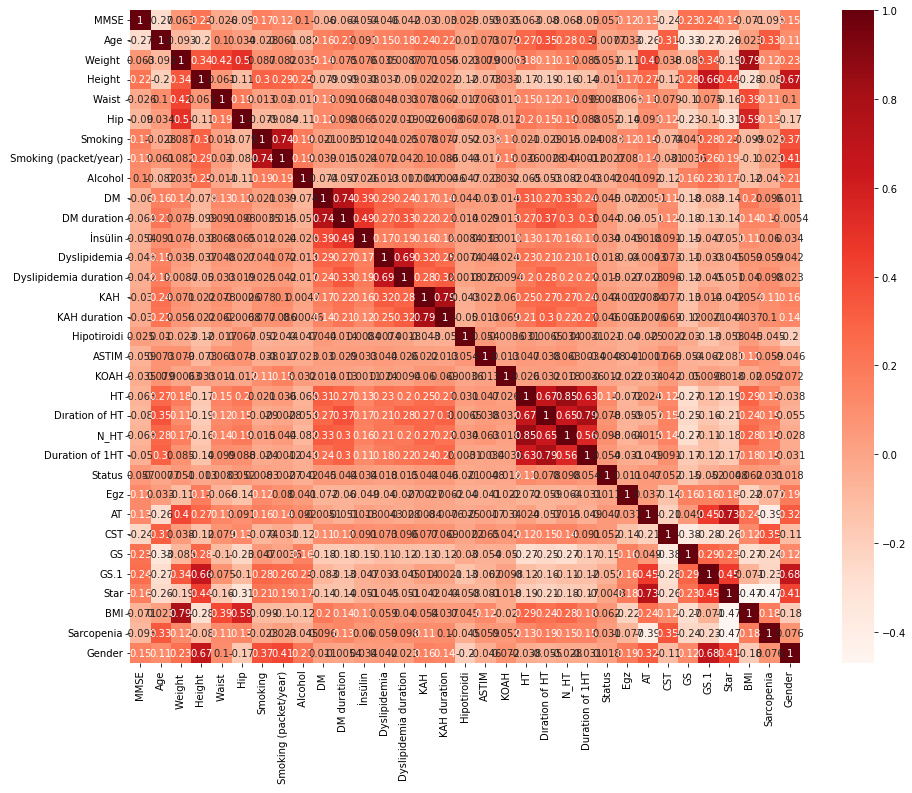

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
X = data_mod.drop(columns='Sarcopenia')
y = data_mod.Sarcopenia

In [27]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [28]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(X.values, y.values, SL, X.columns)

In [29]:
print(selected_columns)

Index(['MMSE', 'Weight ', 'DM ', 'Dyslipidemia', 'Dyslipidemia duration', 'HT',
       'Dıration of HT', 'N_HT', 'AT', 'CST', 'GS', 'GS.1', 'Star', 'BMI',
       'Gender'],
      dtype='object')


In [30]:
reg_OLS = sm.OLS(y, X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Sarcopenia   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              125.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:30:57   Log-Likelihood:                         -815.95
No. Observations:                3346   AIC:                                      1696.
Df Residuals:                    3314   BIC:                                      1892.
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MMSE                       0.0055      0.002      2.660      0.008       0.001       0.010
Age                        0.0007      0.001      0.997      0.319      -0.001       0.002
Weight                     0.0029      0.001      2.362      0.018       0.000       0.005
Height                     0.0005      0.001      0.538      0.590      -0.001       0.002
Waist                     -0.0002      0.000     -0.565      0.572      -0.001       0.000
Hip                    -4.091e-05      0.000     -0.090      0.929      -0.001       0.001
Smoking                   -0.0006      0.017     -0.036      0.971      -0.034       0.033
 Smoking (packet/year)    -0.0004      0.000     -0.718      0.473      -0.001       0.001
  Alcohol                  0.0098      0.007      1.480      0.139      -0.003       0.023
DM                        -0.0370      0.018     -2.055      0.040      -0.072      -0.002
DM duration                0.0015      0.001      1.139      0.255      -0.001       0.004
İnsülin                   -0.0375      0.025     -1.504      0.133      -0.086       0.011
Dyslipidemia              -0.0418      0.018     -2.273      0.023      -0.078      -0.006
Dyslipidemia duration      0.0053      0.002      2.962      0.003       0.002       0.009
KAH                        0.0250      0.026      0.947      0.344      -0.027       0.077
KAH duration              -0.0032      0.002     -1.397      0.163      -0.008       0.001
Hipotiroidi               -0.0143      0.015     -0.982      0.326      -0.043       0.014
ASTIM                      0.0208      0.026      0.798      0.425      -0.030       0.072
KOAH                       0.0094      0.049      0.193      0.847      -0.086       0.105
HT                        -0.0541      0.022     -2.448      0.014      -0.097      -0.011
Dıration of HT             0.0014      0.001      1.095      0.274      -0.001       0.004
N_HT                       0.0198      0.010      2.074      0.038       0.001       0.039
Duration of 1HT            0.0012      0.002      0.808      0.419      -0.002       0.004
Status                    -0.0003      0.001     -0.528      0.597      -0.001       0.001
Egz                       -0.0063      0.007     -0.971      0.332      -0.019       0.006
AT                        -0.0297      0.003     -9.026      0.000      -0.036      -0.023
CST                        0.0147      0.001     10.710      0.000       0.012       0.017
GS                        -0.0836      0.024     -3.528      0.000      -0.130      -0.037
GS.1                      -0.0142      0.001    -13.424      0.000      -0.016      -0.012
Star                       0.1829      0.095      1.924      0.054      

In [31]:
result = pd.DataFrame()
result['Sarcopenia'] = data_mod.Sarcopenia
result = result.reset_index(drop=True)

In [32]:
data_pval = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [33]:
data_pval.head()

,MMSE,Weight,DM,Dyslipidemia,Dyslipidemia duration,HT,Dıration of HT,N_HT,AT,CST,GS,GS.1,Star,BMI,Gender
0,29.0,88.0,1.0,0.0,0.0,1.0,5.0,1.0,50.2,12.5,1.21,32.0,1.81,27.8,1.0
1,30.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,12.1,1.42,47.0,1.38,35.5,1.0
2,28.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,37.3,8.7,1.18,33.0,1.20,31.2,1.0
3,29.0,68.0,0.0,0.0,0.0,1.0,12.0,3.0,29.5,8.3,1.23,25.0,1.11,26.6,0.0
4,27.0,80.0,0.0,0.0,0.0,1.0,1.5,2.0,39.5,11.0,1.31,31.0,1.26,31.3,0.0


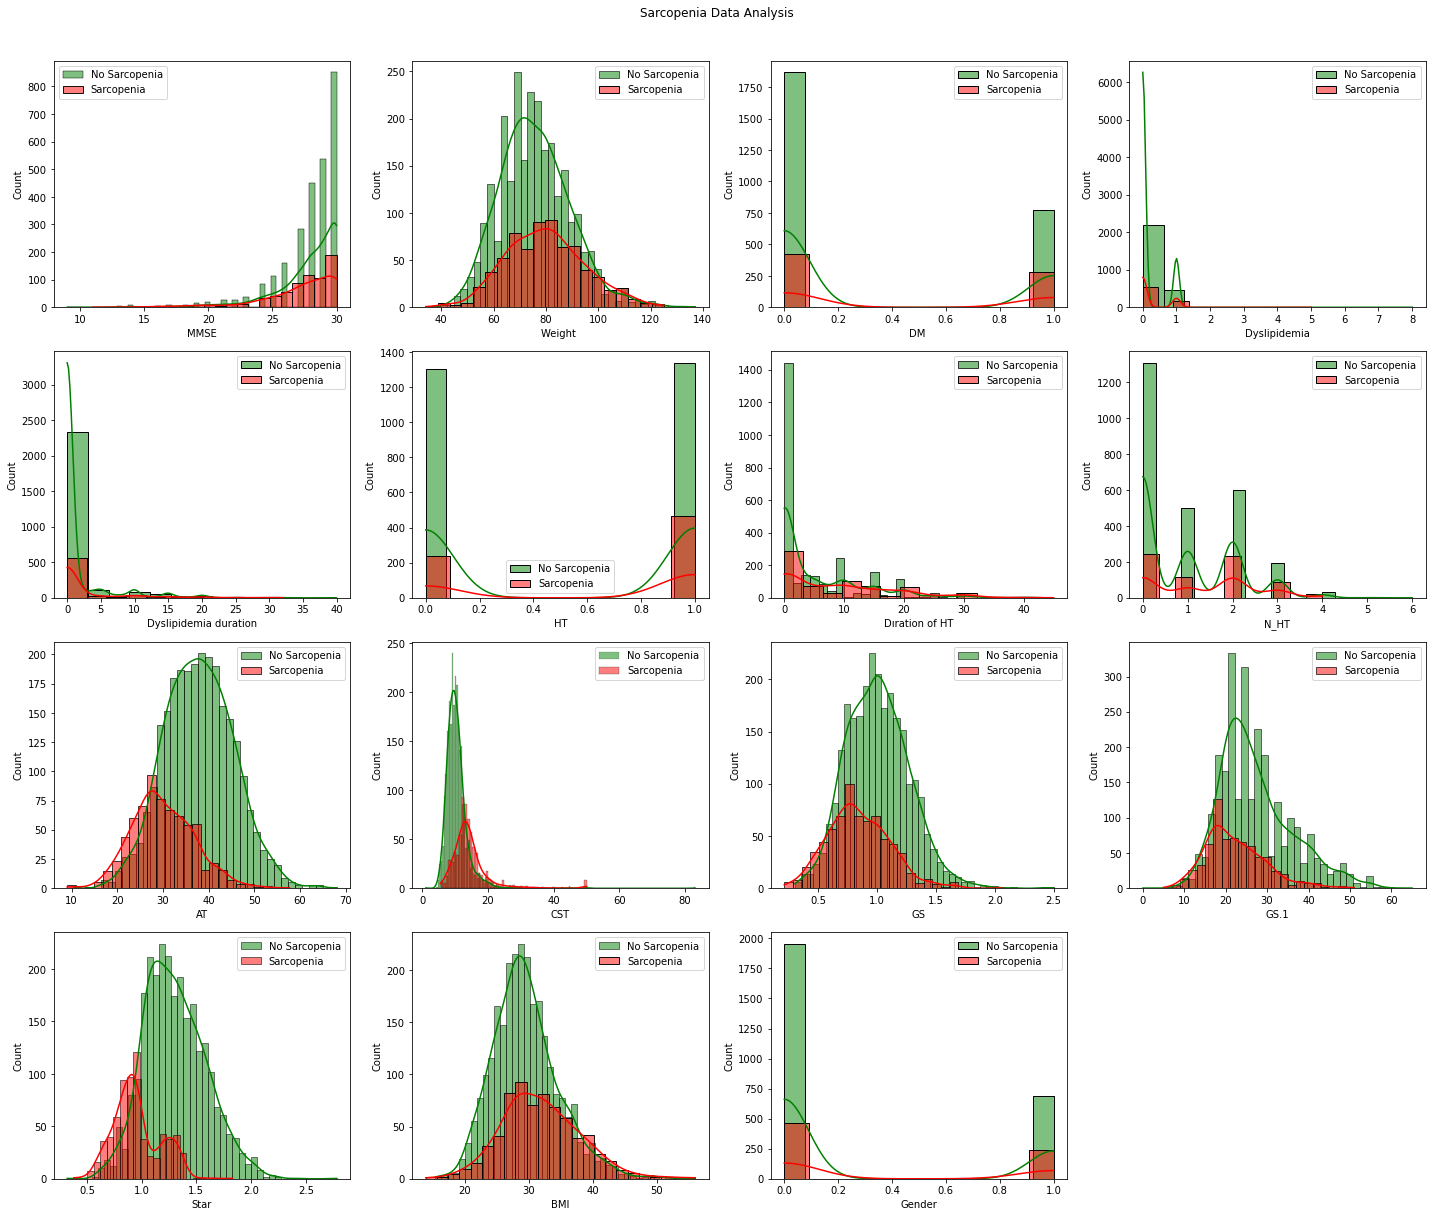

In [34]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_pval.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(data_pval[i][result['Sarcopenia']==0], color='g', label = 'No Sarcopenia', kde=True)
    sns.histplot(data_pval[i][result['Sarcopenia']==1], color='r', label = 'Sarcopenia', kde=True)
    plt.legend(loc='best')
fig.suptitle('Sarcopenia Data Analysis')
fig.tight_layout() 
fig.subplots_adjust(top=0.95)
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_pval, y, test_size = 0.2, random_state=42)

#### Baseline model 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [39]:
prediction = pipe.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(y_test,prediction))
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       555
           1       0.76      0.67      0.71       115

    accuracy                           0.91       670
   macro avg       0.85      0.81      0.83       670
weighted avg       0.90      0.91      0.91       670

Confusion Matrix:
 [[531  24]
 [ 38  77]]


In [41]:
pipe_svc = make_pipeline(StandardScaler(), SVC())

In [42]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [43]:
pred_svc = pipe_svc.predict(X_test)

In [44]:
print(classification_report(y_test,pred_svc))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       555
           1       0.84      0.74      0.79       115

    accuracy                           0.93       670
   macro avg       0.89      0.86      0.87       670
weighted avg       0.93      0.93      0.93       670

Confusion Matrix:
 [[539  16]
 [ 30  85]]


### Sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

#### Oversampling

In [46]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_ros).items()))

[(0, 2086), (1, 2086)]


In [47]:
pipe_os = make_pipeline(StandardScaler(), SVC())
pipe_os.fit(X_train_ros, y_train_ros)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [48]:
pred_os = pipe_svc.predict(X_test)

In [49]:
print(classification_report(y_test,pred_os))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_os))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       555
           1       0.84      0.74      0.79       115

    accuracy                           0.93       670
   macro avg       0.89      0.86      0.87       670
weighted avg       0.93      0.93      0.93       670

Confusion Matrix:
 [[539  16]
 [ 30  85]]


In [50]:
pipe_lr_os = make_pipeline(StandardScaler(), LogisticRegression())

In [51]:
pipe_lr_os.fit(X_train_ros, y_train_ros)
pred_lr_os = pipe_lr_os.predict(X_test)
print(classification_report(y_test,pred_svc))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       555
           1       0.84      0.74      0.79       115

    accuracy                           0.93       670
   macro avg       0.89      0.86      0.87       670
weighted avg       0.93      0.93      0.93       670

Confusion Matrix:
 [[539  16]
 [ 30  85]]


#### SMOTE 

In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 2086), (1, 2086)]


In [53]:
pipe_smote = make_pipeline(StandardScaler(), SVC())
pipe_smote.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [54]:
pred_smote = pipe_smote.predict(X_test)

In [55]:
print(classification_report(y_test,pred_smote))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_smote))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       555
           1       0.68      0.90      0.77       115

    accuracy                           0.91       670
   macro avg       0.83      0.90      0.86       670
weighted avg       0.93      0.91      0.92       670

Confusion Matrix:
 [[507  48]
 [ 12 103]]


#### undersampling

In [56]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 590), (1, 590)]


In [57]:
pipe_us = make_pipeline(StandardScaler(), SVC())
pipe_us.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [58]:
pred_us = pipe_us.predict(X_test)

In [59]:
print(classification_report(y_test,pred_us))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_us))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       555
           1       0.54      0.95      0.69       115

    accuracy                           0.85       670
   macro avg       0.76      0.89      0.80       670
weighted avg       0.91      0.85      0.87       670

Confusion Matrix:
 [[462  93]
 [  6 109]]
